(60000, 28, 28, 1)

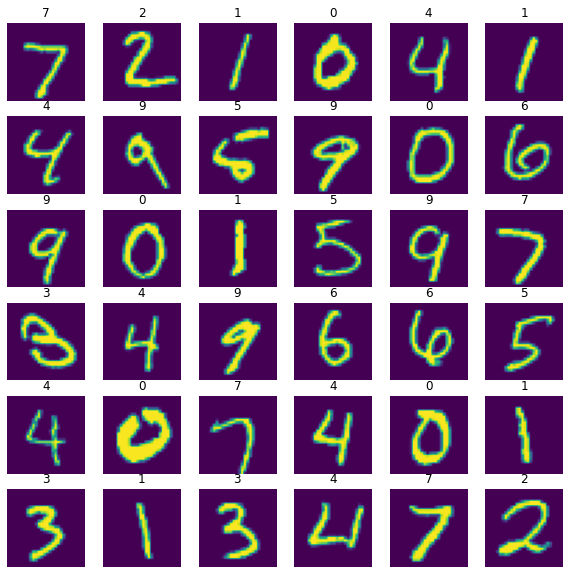

In [11]:
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
import numpy as np

class_names = ['0','1','2','3','4','5','6','7','8','9']
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train / 255
x_test = x_test / 255

y_train = np_utils.to_categorical(y_train, len(class_names))
y_test = np_utils.to_categorical(y_test, len(class_names))

plt.figure(figsize=(10, 10))
for i in range(36):
    ax = plt.subplot(6,6,i+1)
    plt.imshow(x_test[i])
    plt.title(class_names[np.argmax(y_test[i])])    
    plt.axis("off")  
    
x_train.shape

In [9]:
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, MaxPooling2D, Flatten

model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(class_names), activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 21632)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               2769024   
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
____________________________________________

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train, y_train, 
                batch_size=128, 
                epochs=10, 
                validation_data=(x_test, y_test),
                verbose=1)

Epoch 1/10
469/469 [==============================] - 77s 164ms/step - loss: 0.1797 - accuracy: 0.9475 - val_loss: 0.0738 - val_accuracy: 0.9773
Epoch 2/10
469/469 [==============================] - 78s 166ms/step - loss: 0.0528 - accuracy: 0.9842 - val_loss: 0.0580 - val_accuracy: 0.9813
Epoch 3/10
469/469 [==============================] - 77s 164ms/step - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0593 - val_accuracy: 0.9797
Epoch 4/10
469/469 [==============================] - 78s 167ms/step - loss: 0.0177 - accuracy: 0.9947 - val_loss: 0.0497 - val_accuracy: 0.9836
Epoch 5/10
469/469 [==============================] - 87s 186ms/step - loss: 0.0107 - accuracy: 0.9966 - val_loss: 0.0473 - val_accuracy: 0.9857
Epoch 6/10
469/469 [==============================] - 74s 158ms/step - loss: 0.0072 - accuracy: 0.9980 - val_loss: 0.0550 - val_accuracy: 0.9852
Epoch 7/10
469/469 [==============================] - 77s 164ms/step - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.0520 - val_ac

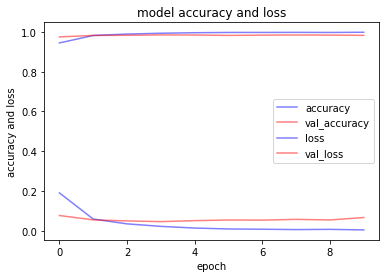

In [4]:
plt.plot(hist.history['accuracy'], 'b', alpha = 0.5, label = 'accuracy')
plt.plot(hist.history['val_accuracy'], 'r', alpha = 0.5, label = 'val_accuracy')
plt.plot(hist.history['loss'], 'b', alpha = 0.5,  label = 'loss')
plt.plot(hist.history['val_loss'], 'r', alpha = 0.5,  label = 'val_loss')
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", round(score[0],2))
print("Test accuracy:", round(score[1],2))
# model.save('mnist_model.h5')

Test loss: 0.06
Test accuracy: 0.99


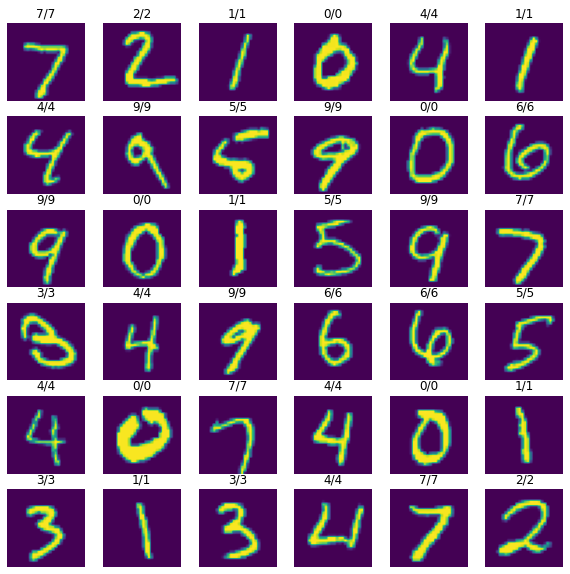

In [13]:
# model = keras.models.load_model('mnist_model.h5')
predictions = model.predict(x_test)

plt.figure(figsize=(10, 10))
for i in range(36):
    ax = plt.subplot(6,6,i+1)
    plt.imshow(x_test[i])
    plt.title(class_names[np.argmax(predictions[i])]+'/'+class_names[np.argmax(y_test[i])])
    plt.axis("off") 